In [129]:
from pathlib import Path
from collections import defaultdict

def load_file(path):
    res = defaultdict(list)
    with Path(path).open() as f:
        for line in f.readlines():
            module, modules = line.strip().split(": ")
            for mod in modules.split(" "):
                res[module].append(mod)
                res[mod].append(module)
    return res



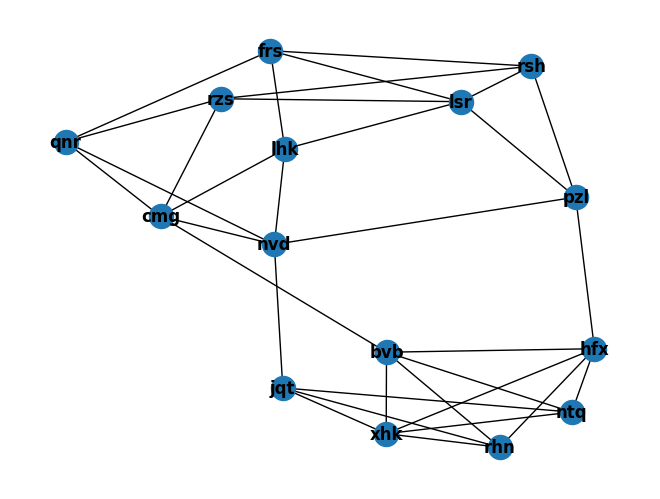

In [153]:
connections = load_file("25_test.txt")
G = nx.Graph()
for mod, modules in connections.items():
    for module in modules:
        G.add_edge(mod, module)
nx.draw(G, with_labels=True, font_weight='bold')

In [165]:
class UnionFind:
    """UnionFind by rank and path compression"""

    def __init__(self, n):
        self.p = [i for i in range(n)]
        self.r = [0] * n

    def find(self, x):
        if self.p[x] == x:
            return x
        else:
            self.p[x] = self.find(self.p[x])
            return self.p[x]

    def union(self, x, y):
        x = self.find(x)
        y = self.find(y)
        if x != y:
            if self.r[x] < self.r[y]:
                self.p[x] = y
            else:
                self.p[y] = x
                if self.r[x] == self.r[y]:
                    self.r[x] += 1

    def conb(self, x, y):
        return self.find(x) == self.find(y) 

In [166]:
connections = load_file("25_input.txt")
remove=[("fxr", "fzb"), ("vgk", "mbq"), ("nmv", "thl")]

for a, b in remove:
    connections[a].remove(b)
    connections[b].remove(a)

In [167]:
k_to_i = {k: i for i, k in enumerate(connections)}
i_to_k = {i: k for i, k in enumerate(connections)}


dsu = UnionFind(len(connections))
for mod, modules in connections.items():
    for module in modules:
        dsu.union(k_to_i[mod], k_to_i[module])

In [173]:
a = dsu.p.count(74)
b = len(connections) - a
a, b

(759, 791)

In [174]:
a * b

600369